# DecisionTree

کاربردش در فرام دیتکشن و پیشبینی اب و هوا

- عدم حساسیت به نورمالایز یا توضیع دیتا
- با دیتای نا مناسب جواب خوبی میده
- تریشولد یابی میکنی
- نسبت به داده های پرت و انرمال خوب کار کینه
- بدیش اینه که راحت اورفیت میشه
- کاهش بی نظمی دیتا
- خالص کردن داده ها همون بی نظمی

![alt text](image-1.png)



![alt text](image-2.png)

- ASM -> میاد فیچری که بیشترین تفکیک پذیری رو داره نشون میده

## ASM
- با این دوتاای اس ام رو درمیارن

- Entropy => میزان بینظمی
- هرچی بیشتر باشه دیتا منظم تره
- هرچی پایین تر باشه بیشتر میشه از دیتا نتیجه گرفت

![alt text](image-4.png)

![alt text](image-6.png)

- pi=> احتمال ان ام

In [1]:
! pip install pydotplus
! pip install graphviz
! pip install --upgrade pydotplus graphviz

In [2]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split , cross_val_score

from sklearn.tree import DecisionTreeClassifier

import pydotplus #=> تبدیل نمودار به عکس
from sklearn.tree import export_graphviz  #=> مدل درخت رو میگیره و به فرمت برنامه گراف ویز در میاره
from IPython.display import Image
from io import BytesIO,StringIO  # فایلی داخل رم ذخیره میشه

In [3]:
x,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.1)
X_train.shape

(135, 4)

- criterion: Literal['gini', 'entropy', 'log_loss'] => همون ظریب های خورد کردن بالا
- splitter: Literal['best', 'random'] => اولی میاد همه فیچر هارو تست میکنه ولی رندم میاد فیچر های رندوم رو انخاب میکنه و برای دیتا هایی که فیچر زیاد دارن
- max_depth: Int | None = None, => تا چه عمقی برم پایین و با کم کردن عمق از اورفیت شدن جلوگیری میشود


In [4]:
model = DecisionTreeClassifier()

sc = cross_val_score(model,X_train,y_train,cv=10)
sc.mean()

np.float64(0.932967032967033)

In [5]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [6]:
model.score(x,y)

0.9933333333333333

In [7]:
p = model.predict(x)

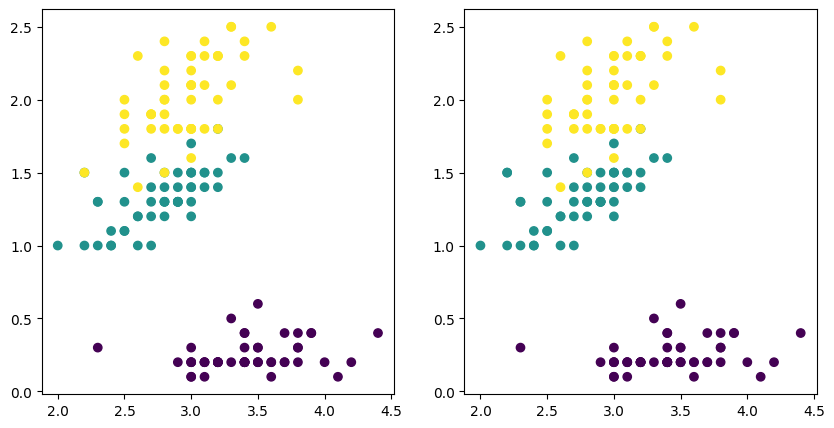

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x[:, 1], x[:, 3], c=y)
plt.subplot(1, 2, 2)

plt.scatter(x[:, 1], x[:, 3], c=p)

In [9]:
# f = open('file.bin','w') # داخل هارد ذخیره میشه
# f.write('some data')

# f = StringIO()  # داخل رم ذخیره میشن 
# f.write('some data')

In [10]:
data = StringIO()
export_graphviz(model , out_file=data,filled=True,rounded=True,special_characters=True)

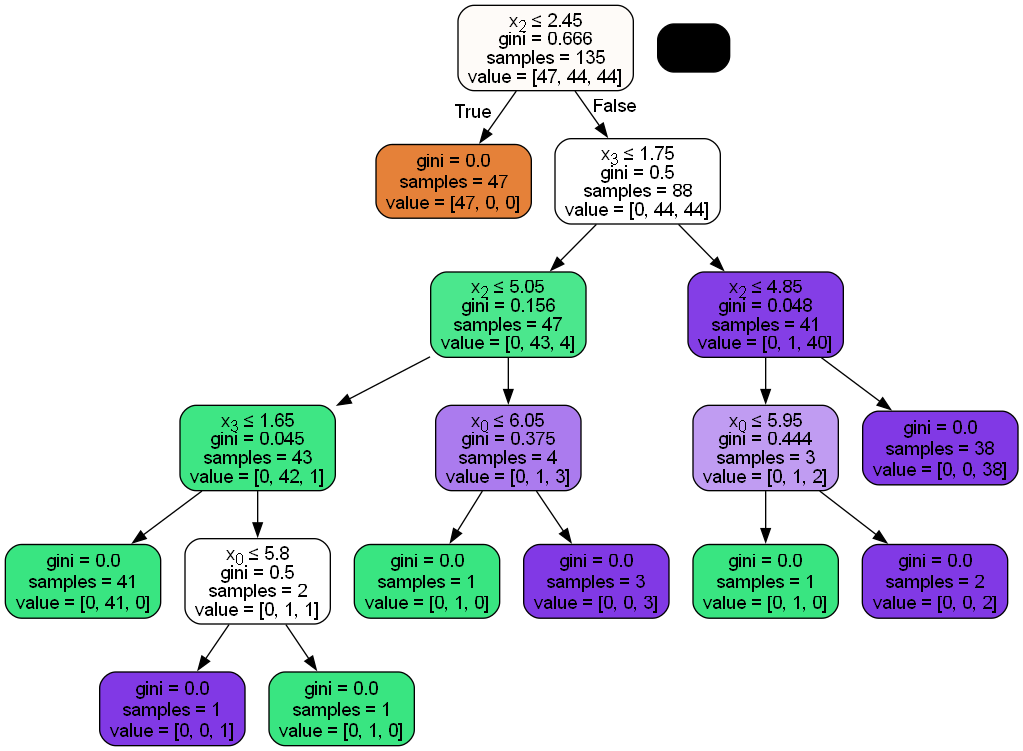

In [11]:
G = pydotplus.graph_from_dot_data(data=data.getvalue())
img = G.create_png()
Image(img)